In [89]:
#importing libraries
import pandas as pd # The prediction step provide correct image path
import numpy as np
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import pandasql as ps
from pandasql import sqldf 
pysqldf = lambda q: sqldf(q, globals())


In [90]:
#reading the csv file
orig_dataframe=pd.read_csv('Stori_Data_Challenge_2021.csv',encoding='utf-8')#,index_col='cust_id')
orig_dataframe.head()
orig_dataframe=orig_dataframe.drop(columns='Unnamed: 0')

In [91]:
#Creating a copy to work in
mod_dataframe=orig_dataframe.copy()
mod_dataframe.info()
mod_dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   activated_date                    8937 non-null   object 
 2   last_payment_date                 8941 non-null   object 
 3   balance                           8948 non-null   float64
 4   balance_frequency                 8950 non-null   float64
 5   purchases                         8950 non-null   float64
 6   oneoff_purchases                  8950 non-null   float64
 7   installments_purchases            8950 non-null   float64
 8   cash_advance                      8838 non-null   float64
 9   purchases_frequency               8950 non-null   float64
 10  oneoff_purchases_frequency        8950 non-null   float64
 11  purchases_installments_frequency  8950 non-null   float64
 12  cash_a

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [92]:
mod_dataframe.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
count,8948.000000,8950.000000,8950.000000,8950.000000,8950.000000,8838.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8629.000000,8950.000000,8950.000000,8950.000000
mean,1564.612804,0.877271,1003.204834,592.437371,411.067645,978.980630,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.173246,0.153715,11.517318,0.007821
std,2081.735635,0.236904,2136.634782,1659.887917,904.338115,2099.762588,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2373.455761,0.292499,1.338331,0.088096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.234272,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.079690,0.000000,12.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,311.963409,0.000000,12.000000,0.000000
75%,2054.525476,1.000000,1110.130000,577.405000,468.637500,1115.395002,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.271126,0.142857,12.000000,0.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.000000


In [93]:
mod_dataframe.isnull().sum().sort_values(ascending=False)

minimum_payments                    321
cash_advance                        112
activated_date                       13
last_payment_date                     9
balance                               2
credit_limit                          1
cust_id                               0
cash_advance_trx                      0
tenure                                0
prc_full_payment                      0
payments                              0
purchases_trx                         0
oneoff_purchases_frequency            0
cash_advance_frequency                0
purchases_installments_frequency      0
purchases_frequency                   0
installments_purchases                0
oneoff_purchases                      0
purchases                             0
balance_frequency                     0
fraud                                 0
dtype: int64

Question 1

1.1 Plot an histogram of the balance amount for all the customers.

1.2 Report any structure you find and any hypotheses you have about that structure.

1.3 Report mean and median balance, grouped by year and month of activated_date.

(array([4.799e+03, 1.859e+03, 8.390e+02, 4.430e+02, 3.260e+02, 2.620e+02,
        1.400e+02, 1.040e+02, 6.500e+01, 4.500e+01, 1.800e+01, 2.000e+01,
        8.000e+00, 7.000e+00, 4.000e+00]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000., 11000., 12000., 13000., 14000., 15000.]),
 <BarContainer object of 15 artists>)

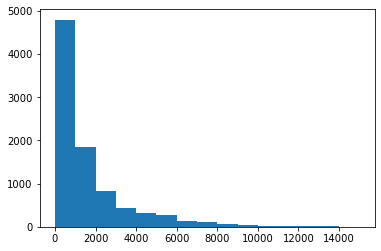

In [94]:
#1.1
plt.hist(orig_dataframe.balance,bins=15, range=[0,15000])

In [95]:
#1.2

In [96]:
#1.3
mod_dataframe['activated_date']= pd.to_datetime(mod_dataframe.activated_date)
mod_dataframe['last_payment_date ']= pd.to_datetime(mod_dataframe.last_payment_date )

avg_balance = mod_dataframe.groupby([pd.DatetimeIndex(mod_dataframe['activated_date']).year,pd.DatetimeIndex(mod_dataframe['activated_date']).month])['balance'].mean()
avg_balance

activated_date  activated_date
2019.0          10.0              2482.234166
                11.0              1848.704323
                12.0              2018.788906
2020.0          1.0               1854.535889
                2.0               1747.350977
                3.0               1554.973023
                4.0               1483.183191
                5.0               1214.333732
                6.0                939.997996
                7.0                649.717622
Name: balance, dtype: float64

In [97]:
median_balance = mod_dataframe.groupby([pd.DatetimeIndex(mod_dataframe['activated_date']).year,pd.DatetimeIndex(mod_dataframe['activated_date']).month])['balance'].median()
median_balance

activated_date  activated_date
2019.0          10.0              1524.409377
                11.0              1082.071173
                12.0              1162.588384
2020.0          1.0               1175.749847
                2.0                994.841733
                3.0                828.954823
                4.0                910.141912
                5.0                734.557681
                6.0                472.791862
                7.0                221.291290
Name: balance, dtype: float64

Question 2
2.1 Report in a table the following information for customers who activated their account and
made their last payment during 2020: cust_id (excluding letters), activated_date (in format
YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance, credit_limit, and a
calculated field of cash_advance as a percentage of credit_limit.

In [98]:
#Formatting fields
mod_dataframe2=mod_dataframe.copy()
mod_dataframe2.info()
mod_dataframe2['activated_date']=mod_dataframe2['activated_date'].dt.to_period('M')
mod_dataframe2['cust_id']=mod_dataframe2['cust_id'].str.replace('C', '')
mod_dataframe2['activated_date'] = mod_dataframe2['activated_date'].apply(str)
mod_dataframe2.info()
mod_dataframe2.head()
#mod_dataframe2.set_index("cust_id", inplace = True) 






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   cust_id                           8950 non-null   object        
 1   activated_date                    8937 non-null   datetime64[ns]
 2   last_payment_date                 8941 non-null   object        
 3   balance                           8948 non-null   float64       
 4   balance_frequency                 8950 non-null   float64       
 5   purchases                         8950 non-null   float64       
 6   oneoff_purchases                  8950 non-null   float64       
 7   installments_purchases            8950 non-null   float64       
 8   cash_advance                      8838 non-null   float64       
 9   purchases_frequency               8950 non-null   float64       
 10  oneoff_purchases_frequency        8950 non-null 

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud,last_payment_date
0,10001,2019-10,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,...,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,2020-09-09
1,10002,2019-10,2020-07-04,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,...,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,2020-07-04
2,10003,2019-10,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,...,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,2020-09-17
3,10004,2019-10,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,...,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0,2020-08-24
4,10005,2019-10,2020-10-20,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,...,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,2020-10-20


In [99]:
#Defining query
#q1="""select cust_id,activated_date,last_payment_date,cash_advance,credit_limit,cash_advance/credit_limit*100
#from mod_dataframe2
#"""
q1="""
select distinct cust_id
from mod_dataframe2 
"""
print(ps.sqldf(q1))

     cust_id
0      10001
1      10002
2      10003
3      10004
4      10005
...      ...
8945   19186
8946   19187
8947   19188
8948   19189
8949   19190

[8950 rows x 1 columns]


Question 3
3.1 Build a predictive model for fraud.
3.2 What explanatory variable was the most powerful predictor for fraud?


In [100]:
#Retreiving a fresh copy of the dataset
model_df=orig_dataframe.copy()
model_df.head()

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [101]:
#Customer ID is a unique id for each customer and therefore is not going to be employed
model_df.drop(['cust_id'], axis=1, inplace=True)
model_df.head()
model_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   activated_date                    8937 non-null   object 
 1   last_payment_date                 8941 non-null   object 
 2   balance                           8948 non-null   float64
 3   balance_frequency                 8950 non-null   float64
 4   purchases                         8950 non-null   float64
 5   oneoff_purchases                  8950 non-null   float64
 6   installments_purchases            8950 non-null   float64
 7   cash_advance                      8838 non-null   float64
 8   purchases_frequency               8950 non-null   float64
 9   oneoff_purchases_frequency        8950 non-null   float64
 10  purchases_installments_frequency  8950 non-null   float64
 11  cash_advance_frequency            8950 non-null   float64
 12  cash_a

In [102]:
#We drop as well credit_limit null value (1 register)
model_df_red=model_df.copy()
model_df.dropna(subset=['credit_limit'], inplace=True)
#Droping dates since datatype not right for mean
model_df.dropna(subset=['activated_date'], inplace=True)
model_df.dropna(subset=['last_payment_date'], inplace=True)
#Mean of minimum payments
model_df.loc[(model_df['minimum_payments'].isnull()==True),'minimum_payments']=model_df['minimum_payments'].mean()
model_df.loc[(model_df['balance'].isnull()==True),'balance']=model_df['balance'].mean()
#Assuming NA on cash_advance is 0
model_df['cash_advance'] = model_df['cash_advance'].fillna(0)
model_df.isnull().sum().sort_values(ascending=False).head()


activated_date       0
last_payment_date    0
tenure               0
prc_full_payment     0
minimum_payments     0
dtype: int64

<AxesSubplot:xlabel='fraud'>

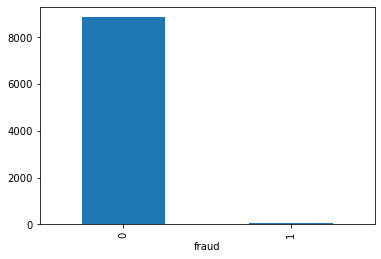

In [103]:
#Fraud and no fraud
model_df.groupby(['fraud']).size().plot(kind="bar")

In [104]:
q2="""
select count(*), fraud 
from mod_dataframe2
group by fraud
"""
print(ps.sqldf(q2))



   count(*)  fraud
0      8880      0
1        70      1


In [105]:
# Print the ratio of fraud cases
occ = model_df['fraud'].value_counts()
print(occ /len(model_df.index))# Fraud about 0.7%

0    0.992159
1    0.007841
Name: fraud, dtype: float64


se ve que tenemos 70 registros de fraude, vamos a descartar los valores nulos para 

In [106]:
#Definition of preparing data
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """ Convert the DataFrame into two variable
    X: data columns (C2 - C21)
    y: label column
    """
    X = df.iloc[:, 2:21].values
    y = df.fraud.values
    return X, y

In [107]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="not fraud #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="fraud #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

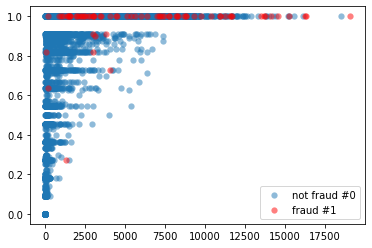

In [108]:
# Create X and y  using the prep_data function 
X, y = prep_data(model_df)
# Plotting  our data by running our plot data function on X and y
plot_data(X, y)

In [109]:
#Vemos la forma de nuestros conjuntos
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (8927, 18)
y shape: (8927,)


In [110]:
#We are using a Applying Synthetic Minority Oversampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, classification_report


oversample = SMOTE()
#Split features
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8,random_state=0)
#Apply resampling
X_resampled,y_resampled=oversample.fit_resample(X_train,y_train)
#Define model
model=LinearRegression()
#
model.fit(X_train,y_train)
#Get performance
y_predicted=model.predict(X_test)

#Compare y_test to predictions
print(r2_score(y_test,y_predicted))

1.0


Post analysis

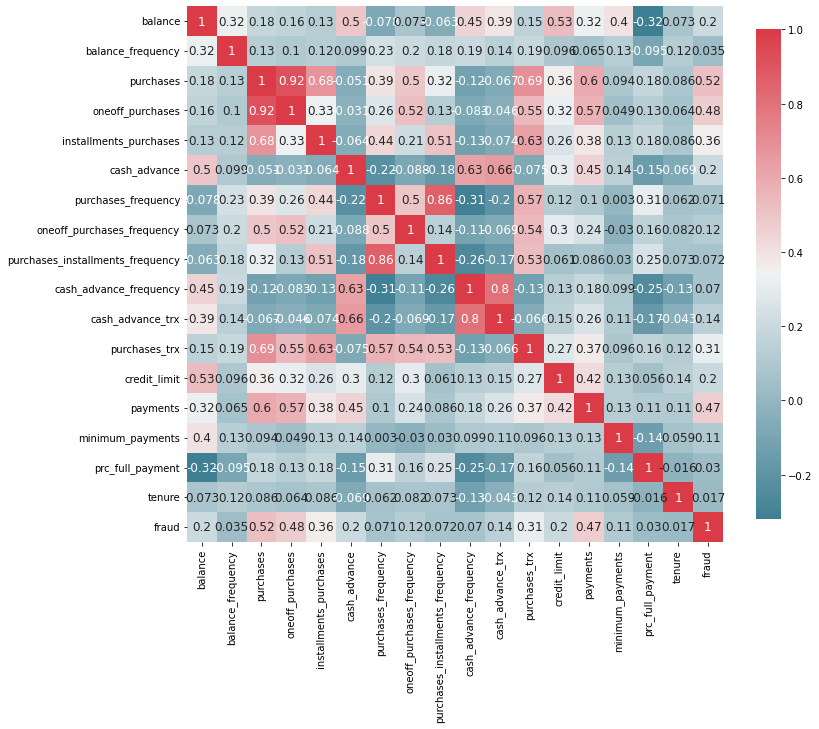

In [113]:
model_df_red.head()
#Correlation graph
def plot_correlation_map( df ):
    corr = model_df_red.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )


plot_correlation_map( model_df_red )